In [2]:
import numpy as np
from skimage import io, color, measure, draw, img_as_bool
from scipy import optimize
import EllipseFitter
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

%matplotlib inline

/usr/users/spardy/miniconda3/envs/py2/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
img = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
                [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Optimization terminated successfully.
         Current function value: -79.000000
         Iterations: 17
         Function evaluations: 78


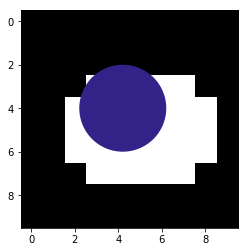

In [4]:
#a = EllipseFitter.EllipseFitter(img)

def cost(params):
    x0, y0, rx, ry = params
    coords = draw.ellipse(y0, x0, rx, ry, shape=img.shape)
    template = np.zeros_like(img)
    template[coords] = 1
    return (-np.sum((template == img)))#+(np.sum(template != img)**2)

x0, y0, rx, ry = optimize.fmin(cost, (4.0, 4.0, 4.0, 4.0))

f, ax = plt.subplots()

ellipse = Ellipse(xy=(x0, y0), width=rx, height=ry)
#ellipse2 = Ellipse(xy=(a[3], a[4]), width=a[1], height=a[2])

ax.imshow(img, cmap='gray', interpolation='nearest')
ax.add_artist(ellipse)
#ax.add_artist(ellipse2)


In [5]:
    img=np.array([[0,0,0,1,1,1,0,0,0],
                  [0,0,1,1,1,1,1,0,0],
                  [0,1,1,1,1,1,1,1,0],
                  [1,1,1,1,1,1,1,1,1],
                  [1,1,1,1,1,1,1,1,1],
                  [1,1,1,1,1,1,1,1,1],
                  [0,1,1,1,1,1,1,1,0],
                  [0,0,1,1,1,1,1,0,0],
                  [0,0,0,1,1,1,0,0,0]])

In [8]:
a = EllipseFitter.EllipseFitter(img)


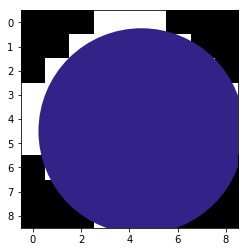

In [10]:
fig, ax = plt.subplots(1)
ellipse2 = Ellipse(xy=(a[3], a[4]), width=a[1], height=a[2])

ax.imshow(img, cmap='gray', interpolation='nearest')
ax.add_artist(ellipse2)